In [1]:
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images[0,23,23]

194

#### This makes it clear that we have grayscale images in the dataset

In [7]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

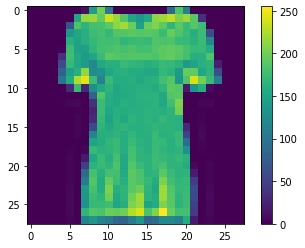

In [15]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing
#### We scale the pixels to the value between 0 and 1.

In [16]:
train_images=train_images/255.0
test_images=test_images/255.0

In [22]:
# Defining the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(train_images, train_labels, epochs=1)


1875/1875 [==============================] - 9s 5ms/step - loss: 0.1432 - accuracy: 0.9458


In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc) 

313/313 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8866
Test accuracy: 0.8866000175476074


#### At epochs=5, Train data is giving 92.35% accuracy, but on test data it is 88.92%

#### At epochs=3, Train data is giving 92.94% accuracy, but on test data it is 88.4%

#### At epochs=1, Train data is giving 93.14% accuracy, but on test data it is 89.11%

## Predictions

In [32]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [33]:
np.argmax(predictions[0])

9

Pick a number: 21
1/1 [==============================] - 0s 23ms/step


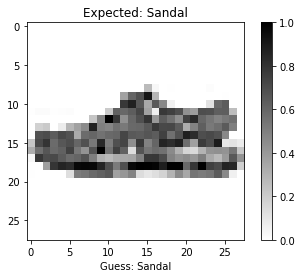

In [47]:
COLOR = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'



def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.title("Expected: " + label)
  plt.title("Expected: " + label).set_color('black')
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

In [35]:
ww